# Even vs uneven spacing

## Evenly spaced data

As long as this data is evenly spaced with step size $h$, we can use finite difference directly.

BUT: Be aware of the boundaries! The central difference is the superior choice for the interior points, but you will need forward and backward differences at the boundaries.

#### Example: Find the derivative of a discretized function

Say we have data for a function $y(x)$ that looks like a parabola. We measured it every $h$ steps in the range [a,b], so we have data for $x_0 = a$ to $x_n = b$

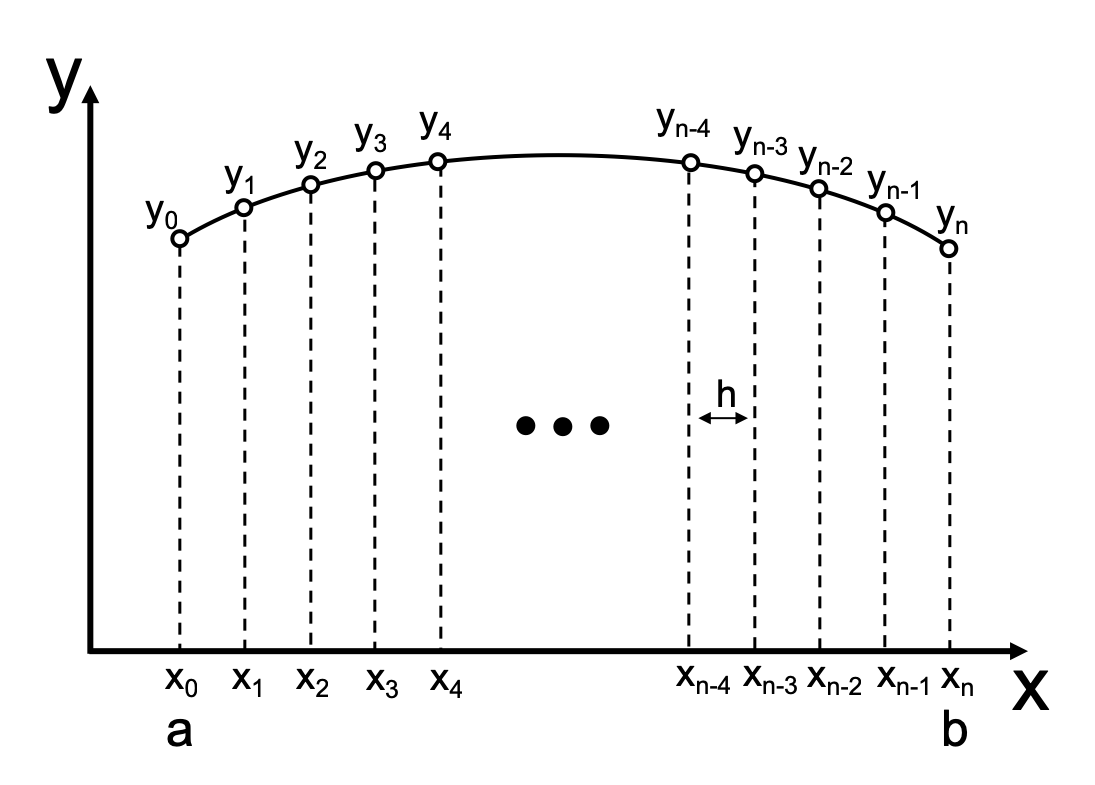

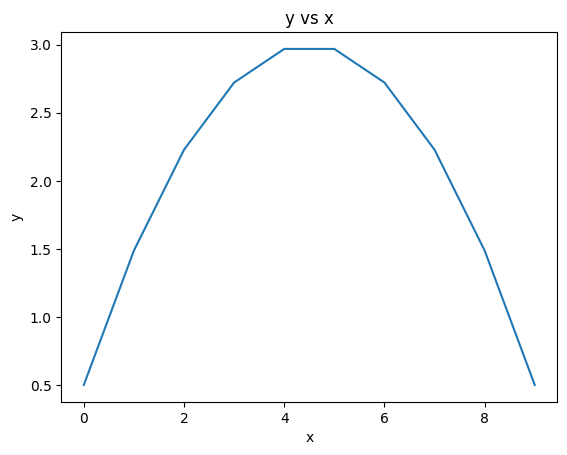

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([0.5, 1.48765432, 2.22839506, 2.72222222, 2.9691358, 2.9691358,
 2.72222222, 2.22839506, 1.48765432, 0.5 ])

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.show()

If we just applied central difference to this function would encounter problems at the endpoints.

The numpy function *gradient* identifies the endpoints and treats them with forward / backward difference:

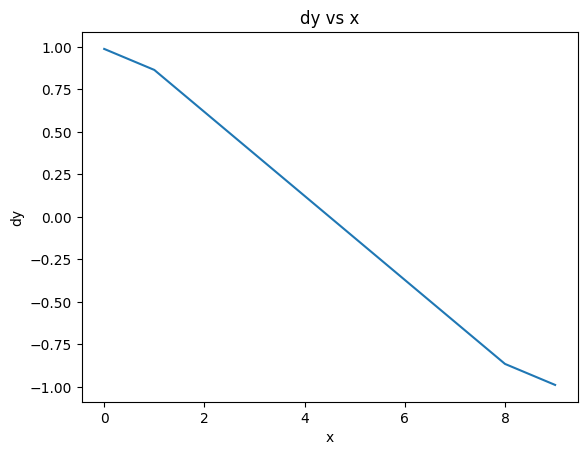

In [ ]:
dy = np.gradient(y,x)

plt.plot(x, dy)
plt.xlabel('x')
plt.ylabel('dy')
plt.title('dy vs x')
plt.show()

This looks good in the middle but the ends are funny...

What do you think?

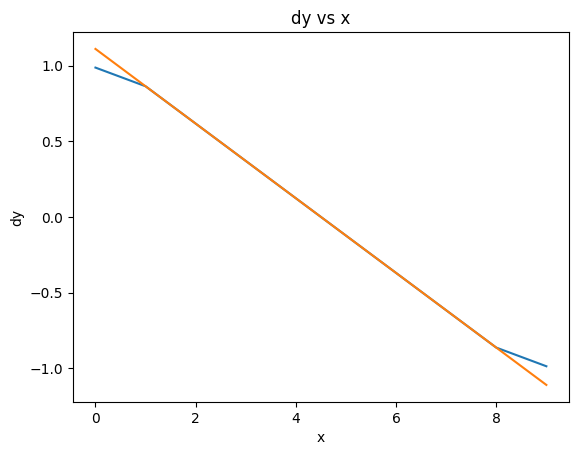

In [ ]:
dy2 = np.gradient(y,x, edge_order = 2)

plt.plot(x, dy)
plt.plot(x, dy2)
plt.xlabel('x')
plt.ylabel('dy')
plt.title('dy vs x')
plt.show()

Bingo! Using the higher order edge cases solved the problem!

Note, this is the foundation of the finite difference method for solving differential equations.

## Unevenly spaced data

When data is unevenly spaced we can always do first-order forward / backward difference. If we want higher order generally have to resort to a local polynomial fitting.

Recall the cubic Lagrange interpolation. We can take the (analytic) derivative and find:

$$
f'(x) = f(x_{i-1}) \frac{2x - x_i-x_{i+1}}{(x_{i-1}-x_i) (x_{i-1}-x_{i+1})} +f(x_{i}) \frac{2x - x_{i-1}-x_{i+1}}{(x_{i}-x_{i-1}) (x_{i}-x_{i+1})} + f(x_{i+1}) \frac{2x - x_{i-1}-x_{i}}{(x_{i+1}-x_{i-1}) (x_{i+1}-x_{i})} $$

which is of comparable accuracy to the centeral difference and recovers it if the points are equally spaced.